In [1388]:
import NeuroAnalysisTools
import NeuroAnalysisTools.core.FileTools as ft
import NeuroAnalysisTools.RetinotopicMapping as rm
import os
import tifffile as tf
from os.path import join as pjoin
import numpy as np
from scipy.ndimage import gaussian_filter,median_filter
import matplotlib.pyplot as plt

%matplotlib inline


In [1389]:
# load data

path = r'/home/lzx/data/WF_VC_liuzhaoxi/24.05.20_H78/retinotopy/process/20240520-194029-retinotopy'
altitude_map = np.load(pjoin(path,'1phase_el.npy'))
azimuth_map = np.load(pjoin(path,'2phase_az.npy'))
altitude_power_map = np.load(pjoin(path,'mag_el.npy'))
azimuth_power_map = np.load(pjoin(path,'mag_az.npy'))
vasculature_map = np.load(path[:-10]+r'wfield//frames_average.npy')[0]

In [1390]:
altitude_power_map = median_filter(altitude_power_map,5)
azimuth_power_map = median_filter(azimuth_power_map,5)

# Defining image analysis parameters
#### This is probably the most important part of the whole analysis! The 14 parameters below define the final segmentation results.

phaseMapFilterSigma: The sigma value (in pixels) of Gaussian filter for altitude and azimuth maps. FLOAT, default = 1.0, recommended range: [0.0, 2.0]. Large "phaseMapFilterSigma" gives you more patches. Small "phaseMapFilterSigma" gives you less patches.

signMapFilterSigma: The sigma value (in pixels) of Gaussian filter for visual sign maps. FLOAT, default = 9.0, recommended range: [0.6, 10.0]. Large "signMapFilterSigma" gives you less patches. Small "signMapFilterSigma" gives you more patches.

signMapThr: Threshold to binarize visual signmap. FLOAT, default = 0.35, recommended range: [0.2, 0.5], allowed range: [0, 1). Large signMapThr gives you fewer patches. Smaller signMapThr gives you more patches.

closeIter: Binary close iteration for each raw patches. INT, default = 3. You do not want to change this parameter very often.

openIter: Binary open iteration for each raw patches. INT, default = 3. You do not want to change this parameter very often

dilationIter: Binary dilation iteration for each raw patches. INT, default = 15. You do not want to change this parameter very often.

borderWidth: Pixel number between adjcent patches. INT, default = 1. You do not want to change this parameter very often.

smallPatchThr: The patches with pixel number below smallPatchThr will be discarded. INT, default = 100. You do not want to change this parameter very often.

eccMapFilterSigma: The sigma value of Gaussian filter for eccentricity maps. FLOAT, default = 10.0. You do not want to change this parameter very often.

visualSpacePixelSize: The pixel size for patch to visual space mapping. FLOAT, default = 0.5. You do not want to change this parameter very often.

visualSpaceCloseIter: The binary iteration for visual space coverage for each patch. INT, default = 15. You do not want to change this parameter very often.

splitLocalMinCutStep: The step width for detecting number of local minimums during spliting. The local minimums detected will be used as marker in the following open cv watershed segmentation. FLOAT, default = 5.0, recommend range: [0.5, 15.0]. Small "splitLocalMinCutStep" will make it more likely to split but into less sub patches. Large "splitLocalMinCutStep" will make it less likely to split but into more sub patches.

splitOverlapThr: Patches with overlap ration larger than this value will go through the split procedure. FLOAT, default = 1.1, recommend range: [1.0, 1.2], should be larger than 1.0. Small "splitOverlapThr" will split more patches. Large "splitOverlapThr" will split less patches.

mergeOverlapThr: Considering a patch pair (A and B) with same sign, A has visual coverage a deg2 and B has visual coverage b deg2 and the overlaping visual coverage between this pair is c deg2. Then if (c/a < "mergeOverlapThr") and (c/b < "mergeOverlapThr"), these two patches will be merged. FLOAT, default = 0.1, recommend range: [0.0, 0.2], should be smaller than 1.0. Small "mergeOverlapThr" will merge less patches. Large "mergeOverlapThr" will merge more patches.

In [1391]:
import pickle
with open(pjoin(path,'retinotopy_out.pkl'), 'rb') as f:
    data = pickle.load(f)
    
print(data['mouseID'],data['dateRecorded'])
data['params']
# data.keys()

H78 20240520


{'phaseMapFilterSigma': 0.4,
 'signMapFilterSigma': 10,
 'signMapThr': 0.11,
 'eccMapFilterSigma': 10.0,
 'splitLocalMinCutStep': 5,
 'closeIter': 3,
 'openIter': 3,
 'dilationIter': 15,
 'borderWidth': 1,
 'smallPatchThr': 100,
 'visualSpacePixelSize': 0.5,
 'visualSpaceCloseIter': 15,
 'splitOverlapThr': 1.1,
 'mergeOverlapThr': 0.1}

In [1392]:
params = {
 'phaseMapFilterSigma': 0.4,
 'signMapFilterSigma': 10,
 'signMapThr': 0.1,
 'eccMapFilterSigma': 10.0,
 'splitLocalMinCutStep': 5,
 'closeIter': 3,
 'openIter': 3,
 'dilationIter': 15,
 'borderWidth': 1,
 'smallPatchThr': 100,
 'visualSpacePixelSize': 0.5,
 'visualSpaceCloseIter': 15,
 'splitOverlapThr': 1.1,
 'mergeOverlapThr': 0.1
          }
# params = data['params']

In [1393]:
# Creating the RetinotopicMappingTrail object

trial = rm.RetinotopicMappingTrial(altPosMap=altitude_map,
                                   aziPosMap=azimuth_map,
                                   altPowerMap=altitude_power_map,
                                   aziPowerMap=azimuth_power_map,
                                   vasculatureMap=vasculature_map,
                                   mouseID=data['mouseID'],
                                   dateRecorded=data['dateRecorded'],
                                   comments='',
                                   params=params)
print(trial)

A retinotopic mapping trial: 20240520_MH78


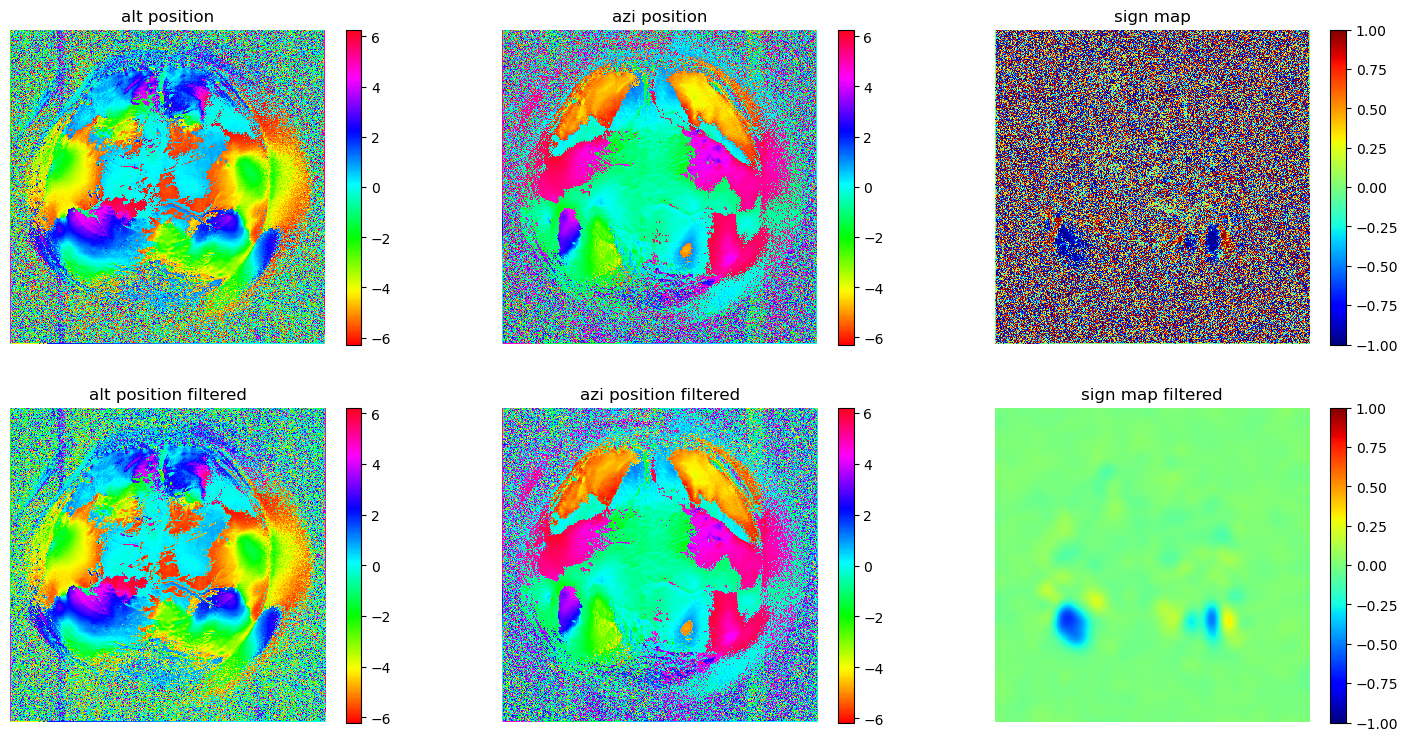

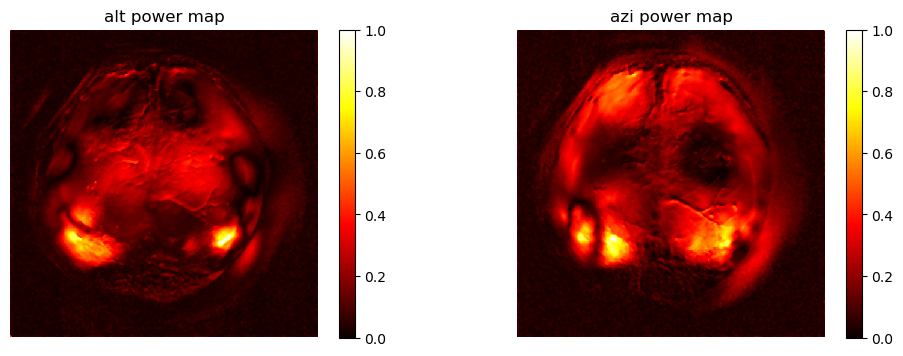

In [1394]:
# Generating visual sign map

trial._getSignMap(isPlot=True, isReverse=False, isFixedRange=False)
plt.show()

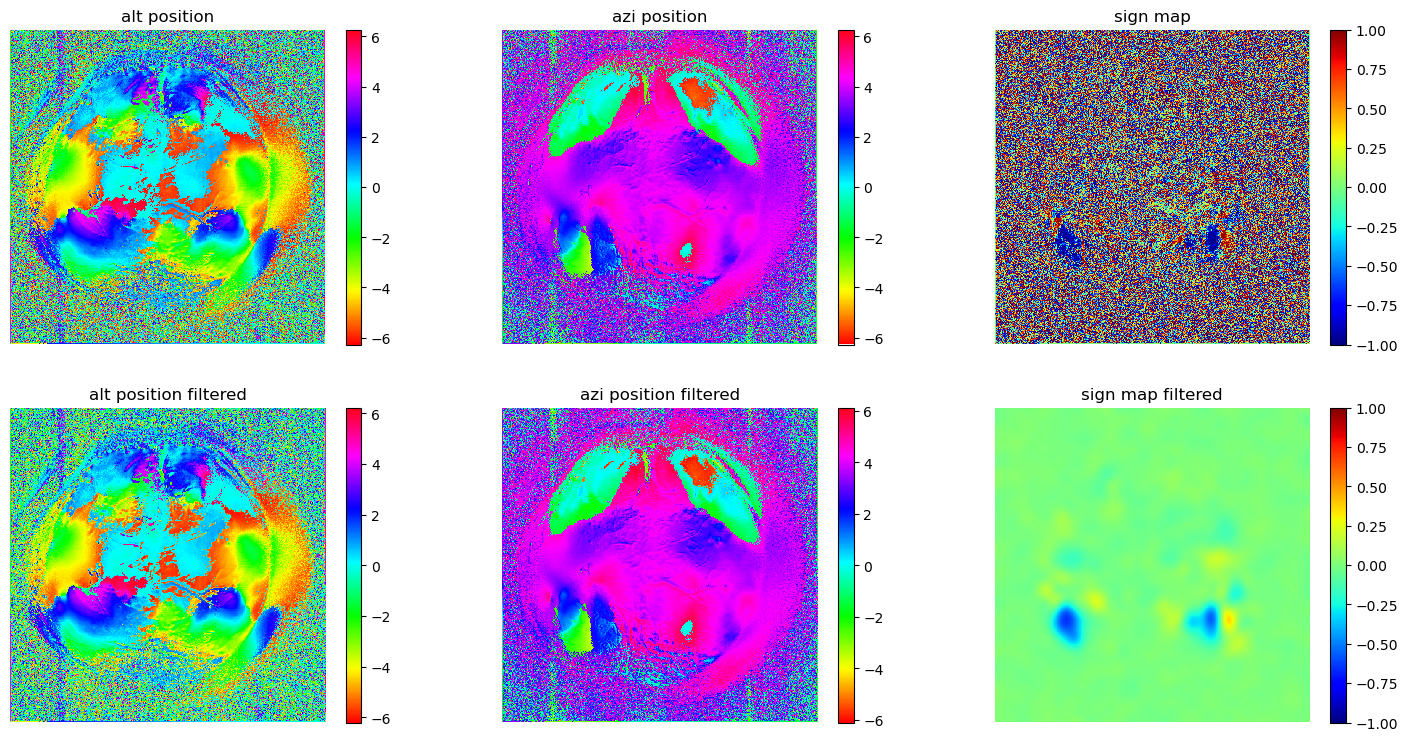

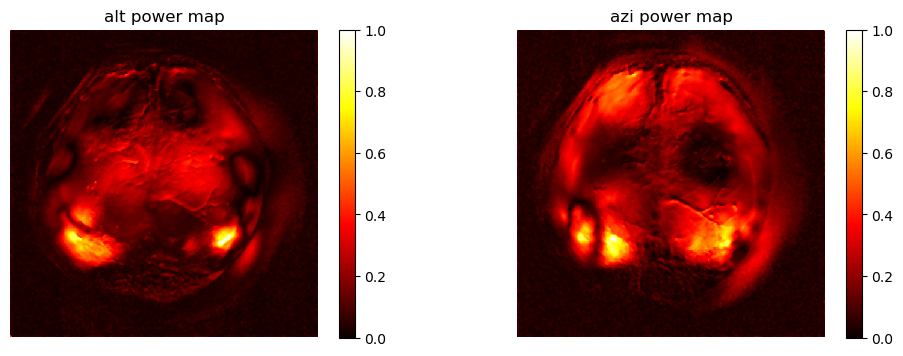

In [1395]:
altitude_map1 = np.load(pjoin(path,'1phase_el.npy'))
azimuth_map1 = np.load(pjoin(path,'1phase_az.npy'))
trial1 = rm.RetinotopicMappingTrial(altPosMap=altitude_map1,
                                   aziPosMap=azimuth_map1,
                                   altPowerMap=altitude_power_map,
                                   aziPowerMap=azimuth_power_map,
                                   vasculatureMap=vasculature_map,
                                   mouseID=data['mouseID'],
                                   dateRecorded=data['dateRecorded'],
                                   comments='',
                                   params=params)
trial1._getSignMap(isPlot=True, isReverse=False, isFixedRange=False)
plt.show()

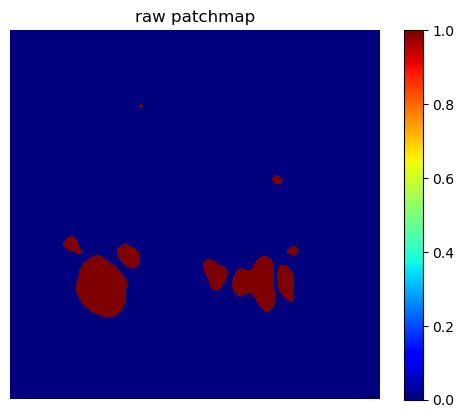

In [1396]:
# Binarizing filtered visual signmap

trial._getRawPatchMap(isPlot=True)
plt.show()

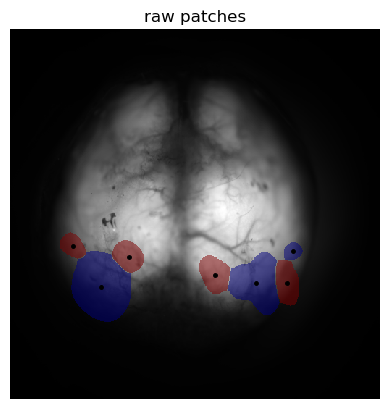

In [1397]:
# Generating raw patches

trial._getRawPatches(isPlot=True)
plt.show()

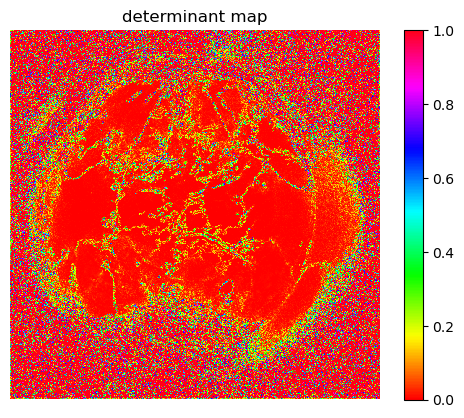

In [1340]:
# Generating determinant map

trial._getDeterminantMap(isPlot=True)
plt.show()

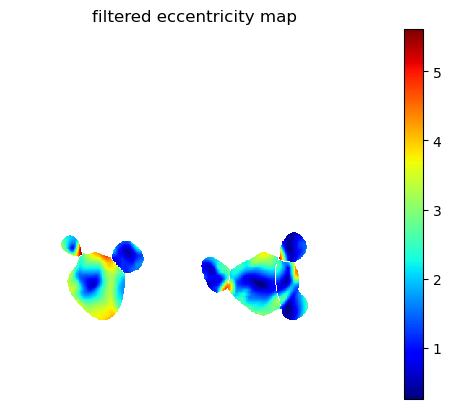

In [1341]:
# Generating eccentricity map for each patch

trial._getEccentricityMap(isPlot=True)
plt.show()

patch01AU=52.0 AS=261.5809950659951 ratio=5.030403751269137
Only one local minumum was found!!!
patch02AU=40.0 AS=64.82688097956702 ratio=1.6206720244891755
Only one local minumum was found!!!
patch03AU=16.25 AS=36.01192378630144 ratio=2.216118386849319
Only one local minumum was found!!!
patch04AU=24.5 AS=38.74472759745764 ratio=1.5814174529574547
Only one local minumum was found!!!
patch05AU=20.75 AS=39.95436422902273 ratio=1.925511529109529
Only one local minumum was found!!!
patch06AU=8.25 AS=8.920888037983215 ratio=1.0813197621797837
patch07AU=15.0 AS=22.152112388930632 ratio=1.4768074925953756
Only one local minumum was found!!!


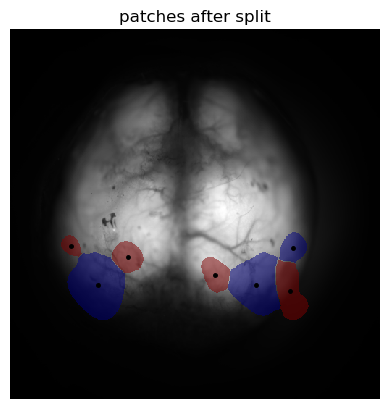

In [1342]:
# Splitting overlapping patches

trial._splitPatches(isPlot=True)
plt.show()

merge iteration: 1


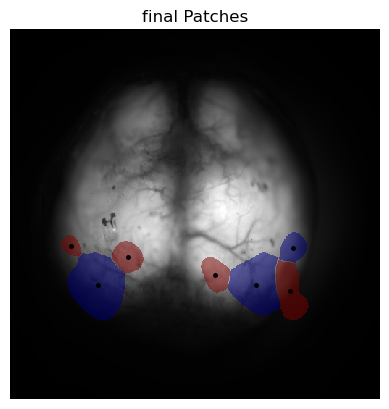

In [1343]:
# Merging non-overlapping patches

trial._mergePatches(isPlot=True)
plt.show()

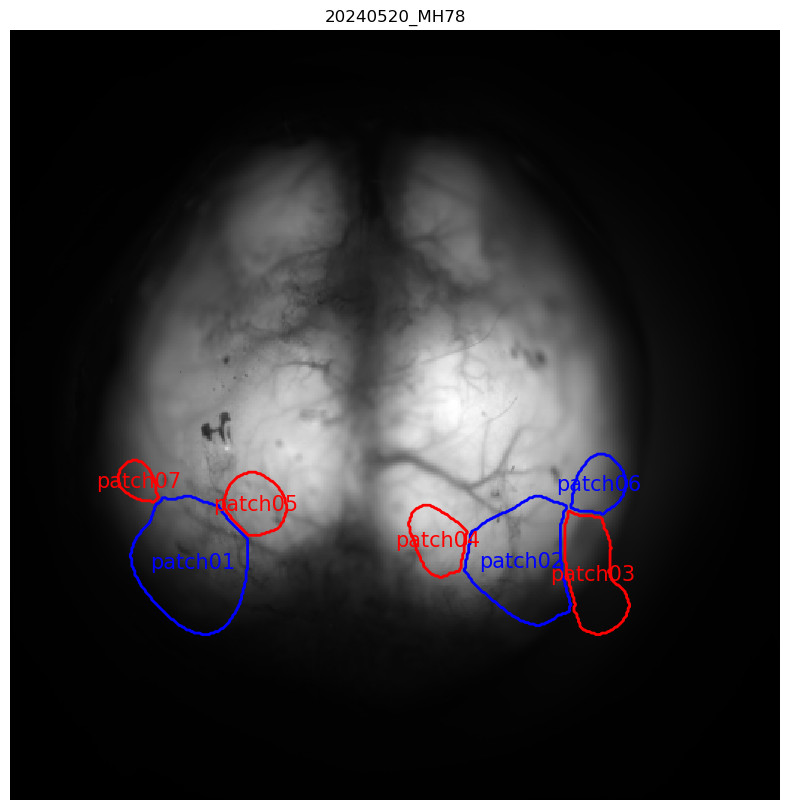

In [1344]:
# Plotting results

trial.plotFinalPatchBorders2()
plt.show()

In [1317]:
# Annotating segmented patches

names = [
        ['patch01', 'V1'],
        ['patch02', 'RL'],
        ['patch03', 'PM'],
        ['patch04', 'LM'],
        ['patch05', 'AM'],
        ['patch06', 'AL'],
        # ['patch07', 'RL'],
        # ['patch08', 'AM'],
        # ['patch09', 'AL'],
        # ['patch11', 'RL'],
        # ['patch12', 'A'],
        ]

finalPatchesMarked = dict(trial.finalPatches)

for i, namePair in enumerate(names):
    currPatch = finalPatchesMarked.pop(namePair[0])
    newPatchDict = {namePair[1]:currPatch}
    finalPatchesMarked.update(newPatchDict)
    
trial.finalPatchesMarked = finalPatchesMarked

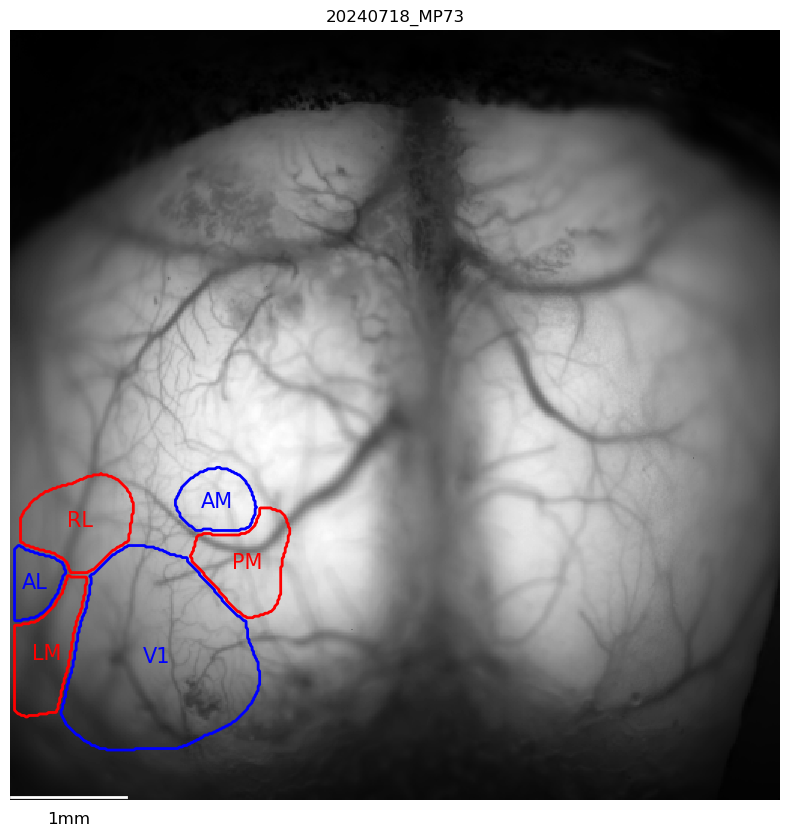

In [1319]:
# Ploting final results

trial.plotFinalPatchBorders2(pixel_um=13)
plt.savefig(os.path.join(path, 'visual_areas.png'), dpi=300, bbox_inches='tight')
plt.show()


In [1320]:
# Generating dictionary for saving

trialDict = trial.generateTrialDict()
trialDict.keys()

dict_keys(['mouseID', 'dateRecorded', 'altPosMap', 'aziPosMap', 'altPowerMap', 'aziPowerMap', 'vasculatureMap', 'comments', 'params', 'altPosMapf', 'aziPosMapf', 'altPowerMapf', 'aziPowerMapf', 'signMap', 'signMapf', 'rawPatchMap', 'eccentricityMapf', 'finalPatches', 'finalPatchesMarked'])

In [1321]:
# Saving results

ft.saveFile(pjoin(path,'retinotopy_out.pkl'), trialDict)

In [1322]:
import pickle
with open(pjoin(path,'retinotopy_out.pkl'), 'rb') as f:
    data = pickle.load(f)
    
data['finalPatchesMarked']

{'V1': <NeuroAnalysisTools.RetinotopicMapping.Patch at 0x7f3cff877f40>,
 'RL': <NeuroAnalysisTools.RetinotopicMapping.Patch at 0x7f3cff877bb0>,
 'PM': <NeuroAnalysisTools.RetinotopicMapping.Patch at 0x7f3cfedaa7c0>,
 'LM': <NeuroAnalysisTools.RetinotopicMapping.Patch at 0x7f3cfedaa8b0>,
 'AM': <NeuroAnalysisTools.RetinotopicMapping.Patch at 0x7f3d04490ca0>,
 'AL': <NeuroAnalysisTools.RetinotopicMapping.Patch at 0x7f3d06bf3b20>}